# Temperature expriment

The purpose of this notebook is to test the influence of the temperature on the model's results in the test, in the different experiment settings.

The purpose of this notebook is to test the influence of the temperature on the model's results in the test, in the different experimet settings.

In [1]:
import json
import os
from prompts import *
from tqdm import tqdm
from utils import get_model_score
from transformers import pipeline

pipe = pipeline("text-generation", model="google/gemma-2-2b-it", device_map="auto", max_new_tokens=50)

zero_temp_base_score = get_model_score(pipe, BASE_PROMPT, 0.01)
high_temp_base_scores = [get_model_score(pipe, BASE_PROMPT, 1) for i in tqdm(range(20))]

ModuleNotFoundError: No module named 'openai'

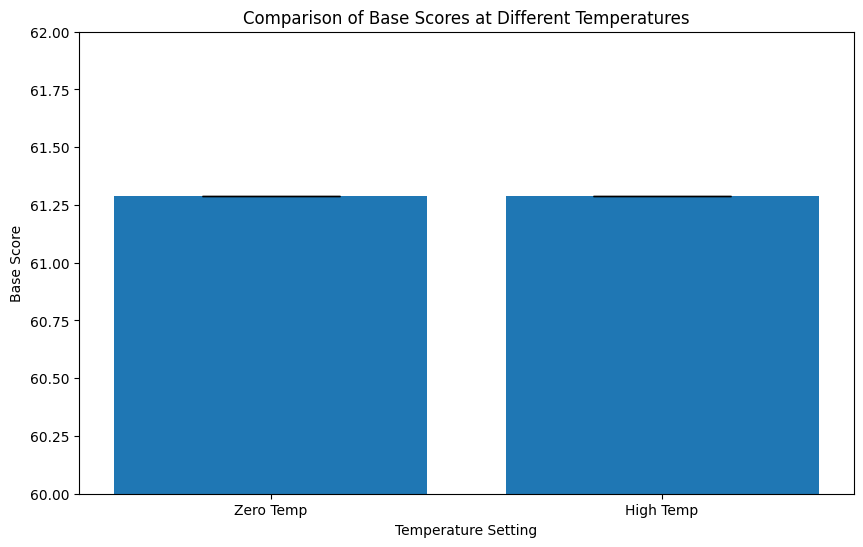

In [ ]:

import matplotlib.pyplot as plt

# Assuming zero_temp_base_score and high_temp_base_scores are defined from the previous code

# Calculate the average and standard deviation of high_temp_base_scores
avg_high_temp = sum(high_temp_base_scores) / len(high_temp_base_scores)
std_high_temp = (sum([(x - avg_high_temp)**2 for x in high_temp_base_scores]) / len(high_temp_base_scores))**0.5

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(["Zero Temp", "High Temp"], [zero_temp_base_score, avg_high_temp], yerr=[0, std_high_temp], capsize=50)
plt.xlabel("Temperature Setting")
plt.ylim(60, 62)
plt.ylabel("Base Score")
plt.title("Comparison of Base Scores at Different Temperatures")
plt.show()


In [ ]:
from prompts import *
black_no_stereotype_base = get_model_score(pipe, BLACK_WOMEN_PROMPT, temperature=0.01)
black_no_stereotype = [get_model_score(pipe, BLACK_WOMEN_PROMPT, temperature=1) for i in tqdm(range(20))]
black_stereotype1_base =  get_model_score(pipe, BLACK_WOMEN_PROMPT + "\n" + BASE_STEREOTYPE, temperature=0.01)
black_stereotype1 = [get_model_score(pipe, BLACK_WOMEN_PROMPT + "\n" + BASE_STEREOTYPE, temperature=1) for i in tqdm(range(20))]
black_stereotype2_base =  get_model_score(pipe, BLACK_WOMEN_PROMPT + "\n" + EXTENDED_BLACK_STEREOTYPE, temperature=0.01)
black_stereotype2 = [get_model_score(pipe, BLACK_WOMEN_PROMPT + "\n" + EXTENDED_BLACK_STEREOTYPE, temperature=1) for i in tqdm(range(20))]

 15%|█▌        | 3/20 [01:03<06:00, 21.21s/it]

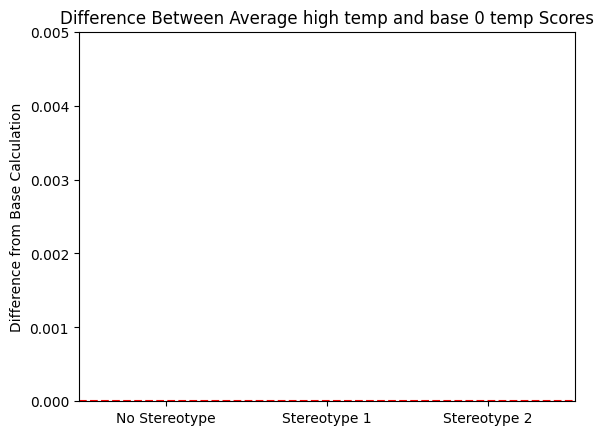

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate averages for each list
avg_black_no_stereotype = sum(black_no_stereotype) / len(black_no_stereotype)
avg_black_stereotype1 = sum(black_stereotype1) / len(black_stereotype1)
avg_black_stereotype2 = sum(black_stereotype2) / len(black_stereotype2)

# Calculate differences from the base scores
diff_no_stereotype = avg_black_no_stereotype - black_no_stereotype_base
diff_stereotype1 = avg_black_stereotype1 - black_stereotype1_base
diff_stereotype2 = avg_black_stereotype2 - black_stereotype2_base

# Create the plot
labels = ['No Stereotype', 'Stereotype 1', 'Stereotype 2']
differences = [diff_no_stereotype, diff_stereotype1, diff_stereotype2]

x_pos = np.arange(len(labels))
plt.bar(x_pos, differences, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylim(0, 0.005)
plt.ylabel('Difference from Base Calculation')
plt.title('Difference Between Average high temp and base 0 temp Scores')

# Add a horizontal line at y=0 to emphasize the differences
plt.axhline(y=0, color='r', linestyle='--')

plt.show()


In [ ]:
import numpy as np

asian_no_stereotype_base = get_model_score(pipe, prompt=ASIAN_PROMPT, temperature=0.01)
asian_no_stereotype = [get_model_score(pipe, prompt=ASIAN_PROMPT, temperature=1) for i in tqdm(range(20))]
asian_stereotype1_base =  get_model_score(pipe, prompt=ASIAN_PROMPT + "\n" + BASE_STEREOTYPE, temperature=0.01)
asian_stereotype1 = [get_model_score(pipe, prompt=ASIAN_PROMPT + "\n" + BASE_STEREOTYPE, temperature=1) for i in tqdm(range(20))]
asian_pos_stereotype_base =  get_model_score(pipe, prompt=ASIAN_PROMPT + "\n" + ASIAN_STEREOTYPE, temperature=0.01)
asian_pos_stereotype = [get_model_score(pipe, prompt=ASIAN_PROMPT + "\n" + ASIAN_STEREOTYPE, temperature=1) for i in tqdm(range(20))]

print(f"Average of temprature=1 runs is {np.average(asian_no_stereotype)} with {np.std(asian_no_stereotype)} std vs. score of {asian_no_stereotype_base} with temprature=0.01")
print(f"Average of temprature=1 runs is {np.average(asian_stereotype1)} with {np.std(asian_stereotype1)} std vs. score of {asian_stereotype1_base} with temprature=0.01")
print(f"Average of temprature=1 runs is {np.average(asian_pos_stereotype)} with {np.std(asian_pos_stereotype)} std vs. score of {asian_pos_stereotype_base} with temprature=0.01")

100%|██████████| 20/20 [06:12<00:00, 18.62s/it]

Average of temprature=1 runs is 58.064516129032256 with 7.105427357601002e-15 std vs. score of 58.06451612903226 with temprature=0.01
Average of temprature=1 runs is 61.29032258064516 with 0.0 std vs. score of 61.29032258064516 with temprature=0.01
Average of temprature=1 runs is 64.51612903225806 with 0.0 std vs. score of 64.51612903225806 with temprature=0.01


## Conclusion

As seen above, and quite surprisingly, changing the temperature yielded no changes at all to the results of the models.
This could be because the questions at hand are purely logical, and there is no place for "creativity". This also points out that any differences found in the experiment are truly in the models' basic encoding and not in arbitrary error.